## Extract coefficient values from all plates

## Import libraries

In [1]:
from joblib import load
import pathlib
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# set model directory
model_dir = pathlib.Path("../3a.train_individual_models/models")

# load final models in to extract coefficients from
model_files = list(model_dir.glob("*final_downsample.joblib"))

# output directory for the coefficients
output_dir = pathlib.Path("coefficients")
output_dir.mkdir(parents=True, exist_ok=True)

# set directory for figure output
fig_dir = pathlib.Path("figures")
fig_dir.mkdir(parents=True, exist_ok=True)

In [3]:
# loop through each model and extract the coefficients
for model_file in model_files:
    # load the model
    model = load(model_file)

    # get the model name
    parts = model_file.stem.split("_")
    model_name = "_".join(parts[:2]) if parts[0] == "combined" else parts[0]

    # get the coefficients
    coefs = pd.DataFrame(
        {"Feature": model.feature_names_in_, "Coefficient": model.coef_.flatten()}
    )

    # add model name to the coefficients
    coefs["Model"] = model_name

    # save the coefficients to a csv file
    coefs.to_csv(output_dir / f"{model_name}_coefficients.csv", index=False)

## Print top coefficients for combined model (batch1)

In [4]:
# print off combined model coefficients in order from most important for healthy prediction
combined_coefs = pd.read_csv(output_dir / "combined_batch1_coefficients.csv")
print(f"Top 10 coefficients for healthy prediction for model {model_name}:")
combined_coefs.sort_values(by="Coefficient", ascending=False).head(10)

Top 10 coefficients for healthy prediction for model localhost240927120001:


,Feature,Coefficient,Model
50,Cells_Intensity_IntegratedIntensityEdge_Actin,1.135307,combined_batch1
55,Cells_Intensity_IntegratedIntensity_Actin,0.874550,combined_batch1
58,Cells_Intensity_MaxIntensityEdge_Actin,0.733733,combined_batch1
185,Cytoplasm_Intensity_MaxIntensity_Actin,0.659362,combined_batch1
379,Nuclei_Intensity_MinIntensity_Hoechst,0.522641,combined_batch1
375,Nuclei_Intensity_MinIntensityEdge_Actin,0.469002,combined_batch1
372,Nuclei_Intensity_MeanIntensityEdge_Hoechst,0.323731,combined_batch1
51,Cells_Intensity_IntegratedIntensityEdge_ER,0.277691,combined_batch1
361,Nuclei_Intensity_LowerQuartileIntensity_PM,0.272119,combined_batch1
393,Nuclei_RadialDistribution_FracAtD_Mitochondria...,0.213506,combined_batch1


In [5]:
# print off combined model coefficients in order from most important for failing prediction
print(f"Top 10 coefficients for failing prediction for model {model_name}:")
combined_coefs.sort_values(by="Coefficient", ascending=True).head(10)

Top 10 coefficients for failing prediction for model localhost240927120001:


,Feature,Coefficient,Model
71,Cells_Neighbors_PercentTouching_Adjacent,-0.858116,combined_batch1
315,Nuclei_Correlation_K_Actin_PM,-0.495879,combined_batch1
5,Cells_AreaShape_Perimeter,-0.371588,combined_batch1
133,Cytoplasm_AreaShape_Area,-0.332958,combined_batch1
65,Cells_Intensity_MeanIntensityEdge_Mitochondria,-0.251476,combined_batch1
425,Nuclei_RadialDistribution_RadialCV_Mitochondri...,-0.247789,combined_batch1
266,Cytoplasm_Texture_InverseDifferenceMoment_PM_3...,-0.245027,combined_batch1
193,Cytoplasm_Location_MaxIntensity_Y_Actin,-0.215959,combined_batch1
346,Nuclei_Granularity_1_Actin,-0.207637,combined_batch1
29,Cells_Correlation_Correlation_Actin_Mitochondria,-0.205917,combined_batch1


## Generate distribution plots of the top actin feature for the batch1 data and the original model data (media only)

### Load in all plates from the batch

In [6]:
# directory with normalized data
data_dir = pathlib.Path("../3.preprocessing_features/data/single_cell_profiles")

# get all of the files with normalized data and concat
data_files = list(data_dir.glob("*_sc_annotated.parquet"))
norm_combined_df = pd.concat([pd.read_parquet(f) for f in data_files], ignore_index=True)

# show dataframe
print(norm_combined_df.shape)
norm_combined_df.head()

(54610, 2023)


,Metadata_WellRow,Metadata_WellCol,Metadata_heart_number,Metadata_cell_type,Metadata_heart_failure_type,Metadata_treatment,Metadata_Pathway,Metadata_Nuclei_Location_Center_X,Metadata_Nuclei_Location_Center_Y,Metadata_Cells_Location_Center_X,...,Nuclei_Texture_Variance_Hoechst_3_02_256,Nuclei_Texture_Variance_Hoechst_3_03_256,Nuclei_Texture_Variance_Mitochondria_3_00_256,Nuclei_Texture_Variance_Mitochondria_3_01_256,Nuclei_Texture_Variance_Mitochondria_3_02_256,Nuclei_Texture_Variance_Mitochondria_3_03_256,Nuclei_Texture_Variance_PM_3_00_256,Nuclei_Texture_Variance_PM_3_01_256,Nuclei_Texture_Variance_PM_3_02_256,Nuclei_Texture_Variance_PM_3_03_256
0,B,2,7,healthy,None,DMSO,None,980.256203,77.211974,995.747159,...,35.962706,36.698976,18.237085,16.980393,20.703256,18.544986,7.176055,7.062642,6.764097,6.778999
1,B,2,7,healthy,None,DMSO,None,753.136818,109.791699,817.073428,...,89.463610,87.727881,20.153832,20.540369,19.661682,17.945038,6.488697,6.260799,6.357955,6.485227
2,B,2,7,healthy,None,DMSO,None,715.905046,128.905710,720.002556,...,49.602410,51.653523,4.375151,4.050006,4.490001,4.402540,5.483689,5.108998,5.109581,5.173336
3,B,2,7,healthy,None,DMSO,None,775.245379,177.171447,795.615332,...,68.262115,67.061776,22.889519,21.737505,20.635684,20.346566,10.306793,10.058368,10.086696,10.143885
4,B,2,7,healthy,None,DMSO,None,480.767918,86.273038,516.485273,...,111.237433,112.351203,43.927059,39.666923,41.511740,43.459069,18.153828,17.491918,17.536999,17.797495


### Generate the plot for the plates in the batch

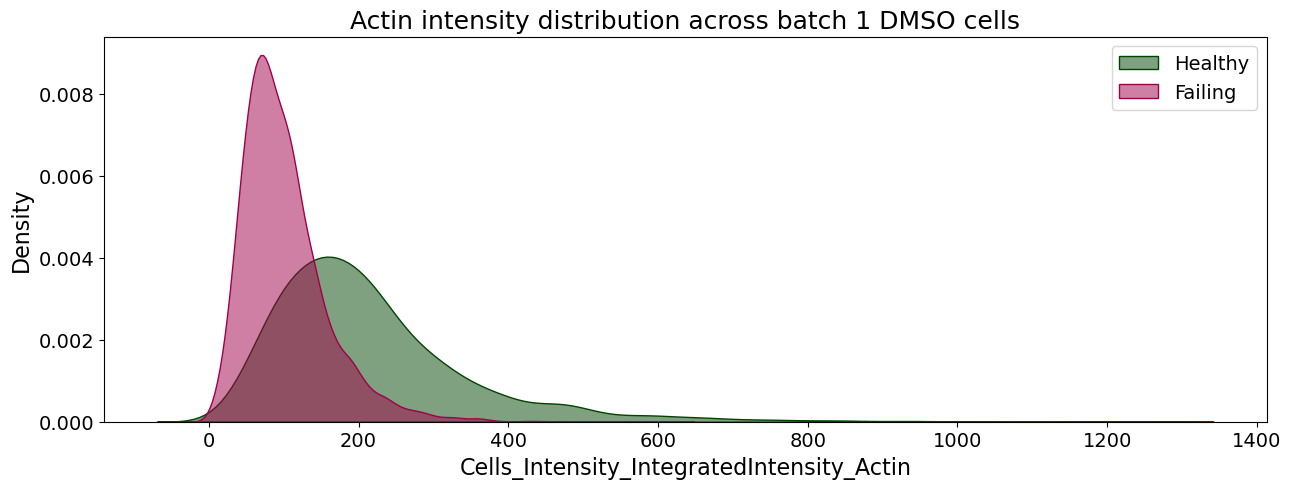

In [7]:
# Increase font sizes globally
plt.rcParams.update({
    "font.size": 16,
    "axes.titlesize": 18,
    "axes.labelsize": 16,
    "xtick.labelsize": 14,
    "ytick.labelsize": 14,
    "legend.fontsize": 14
})

palette_dict = {
    "healthy": "#004400",
    "failing": "#a0004b"
}

# Filter the dataframe for DMSO treatment
filtered_df = norm_combined_df[norm_combined_df["Metadata_treatment"] == "DMSO"]

# Select a feature to plot
feature = "Cells_Intensity_IntegratedIntensity_Actin"

# Create the KDE plot
plt.figure(figsize=(15, 5))
sns.kdeplot(
    data=filtered_df[filtered_df["Metadata_cell_type"] == "healthy"],
    x=feature,
    label="Healthy",
    fill=True,
    alpha=0.5,
    color=palette_dict["healthy"]
)
sns.kdeplot(
    data=filtered_df[filtered_df["Metadata_cell_type"] == "failing"],
    x=feature,
    label="Failing",
    fill=True,
    alpha=0.5,
    color=palette_dict["failing"]
)

# Add labels and legend
plt.title("Actin intensity distribution across batch 1 DMSO cells")
plt.xlabel(feature)
plt.ylabel("Density")
plt.legend()

# Save the plot
plt.savefig(f"{fig_dir}/batch1_actin_intensity_distribution.png", dpi=500, bbox_inches="tight")
plt.show()

### Load in the plate data from the original model

In [8]:
# directory with normalized data
orig_data_dir = pathlib.Path("/media/18tbdrive/1.Github_Repositories/cellpainting_predicts_cardiac_fibrosis/3.process_cfret_features/data/single_cell_profiles/")

# get all of the files with normalized data and concat
orig_annot_df = pd.read_parquet(pathlib.Path(orig_data_dir / "localhost231120090001_sc_annotated.parquet"))

# show dataframe
print(orig_annot_df.shape)
orig_annot_df.head()


(16860, 2023)


,Metadata_WellRow,Metadata_WellCol,Metadata_heart_number,Metadata_cell_type,Metadata_heart_failure_type,Metadata_treatment,Metadata_Nuclei_Location_Center_X,Metadata_Nuclei_Location_Center_Y,Metadata_Cells_Location_Center_X,Metadata_Cells_Location_Center_Y,...,Nuclei_Texture_Variance_Hoechst_3_03_256,Nuclei_Texture_Variance_Mitochondria_3_00_256,Nuclei_Texture_Variance_Mitochondria_3_01_256,Nuclei_Texture_Variance_Mitochondria_3_02_256,Nuclei_Texture_Variance_Mitochondria_3_03_256,Nuclei_Texture_Variance_PM_3_00_256,Nuclei_Texture_Variance_PM_3_01_256,Nuclei_Texture_Variance_PM_3_02_256,Nuclei_Texture_Variance_PM_3_03_256,Outlier_Status
0,B,2,2,Healthy,None,None,787.816143,113.743274,832.342493,109.226914,...,8.737496,2.402478,2.424327,2.378789,2.426765,6.195450,6.115798,5.953039,5.982729,Single-cell passed QC
1,B,2,2,Healthy,None,None,612.015315,258.122523,583.551435,220.881555,...,2.935153,0.749391,0.760774,0.757014,0.778893,6.014494,5.914774,7.516835,6.266337,Single-cell passed QC
2,B,2,2,Healthy,None,None,54.977129,271.567823,69.468928,289.697152,...,4.630538,0.415534,0.413480,0.408241,0.410364,62.191540,63.640391,61.296605,63.573675,Single-cell passed QC
3,B,2,2,Healthy,None,None,199.395062,268.792593,193.914743,269.641581,...,2.711816,0.417965,0.413393,0.391549,0.385171,1.871388,1.714265,1.808903,1.785609,Single-cell passed QC
4,B,2,2,Healthy,None,None,531.072041,276.144082,524.886555,279.036043,...,2.123986,0.270058,0.275807,0.268517,0.268072,0.775387,0.777194,0.763620,0.735567,Single-cell passed QC


### Generate plot with the original data but filter to only the same hearts as the screening data

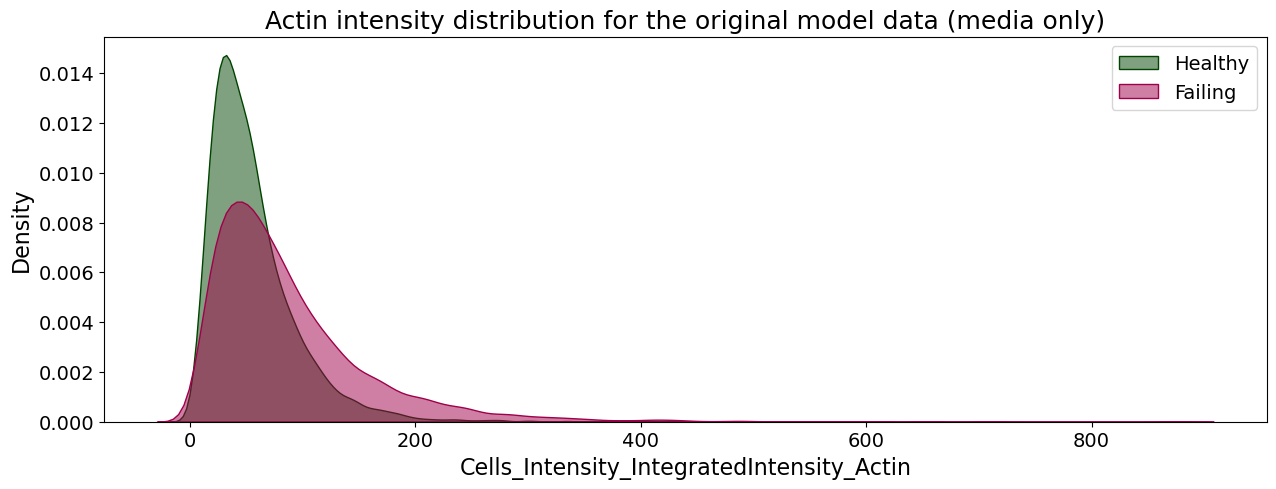

In [9]:
# Increase font sizes globally
plt.rcParams.update({
    "font.size": 16,
    "axes.titlesize": 18,
    "axes.labelsize": 16,
    "xtick.labelsize": 14,
    "ytick.labelsize": 14,
    "legend.fontsize": 14
})

palette_dict = {
    "healthy": "#004400",
    "failing": "#a0004b"
}

# Filter the dataframe only media treatment and hearts 7 and 19
filtered_orig_df = orig_annot_df[orig_annot_df["Metadata_treatment"] != "DMSO"]
filtered_orig_df = filtered_orig_df[filtered_orig_df["Metadata_heart_number"].isin([7, 19])]

# Select a feature to plot
feature = "Cells_Intensity_IntegratedIntensity_Actin"

# Create the KDE plot
plt.figure(figsize=(15, 5))
sns.kdeplot(
    data=orig_annot_df[orig_annot_df["Metadata_cell_type"] == "Healthy"],
    x=feature,
    label="Healthy",
    fill=True,
    alpha=0.5,
    color=palette_dict["healthy"]
)
sns.kdeplot(
    data=orig_annot_df[orig_annot_df["Metadata_cell_type"] == "Failing"],
    x=feature,
    label="Failing",
    fill=True,
    alpha=0.5,
    color=palette_dict["failing"]
)

# Add labels and legend
plt.title("Actin intensity distribution for the original model data (media only)")
plt.xlabel(feature)
plt.ylabel("Density")
plt.legend()
plt.savefig(f"{fig_dir}/orig_model_actin_intensity_distribution.png", dpi=500, bbox_inches="tight")
plt.show()